<a href="https://colab.research.google.com/github/signofcommunication/Smile-Face-Detector/blob/main/Smile_%26_Face_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

Saving REL08131.JPG to REL08131.JPG


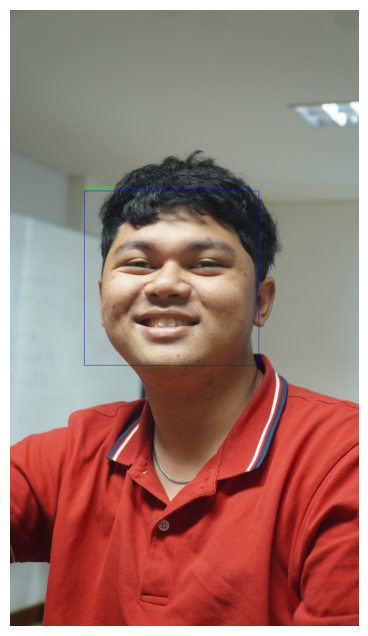

In [ ]:
 # Upload gambar dari device
uploaded = files.upload()

# Ambil nama file
for filename in uploaded.keys():
    img_path = filename

# Load model deteksi wajah & senyum
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

# Baca gambar
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

    # Gambar kotak wajah
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    if len(smiles) > 0:
        cv2.putText(img, "Senyum 😊", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

# Ubah dari BGR ke RGB biar tampil benar di matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan hasil
plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()